# Handwritten Digit Recognisation
This Colab notebook serves as a comprehensive guide to understanding and implementing handwritten digit recognition using popular machine learning techniques.

#Understanding the Problem

Handwritten digit recognition poses a unique set of challenges due to the inherent variability in human handwriting styles, stroke thickness, and spatial orientation. Despite these challenges, advances in machine learning algorithms, particularly deep learning, have enabled significant progress in this domain
.
#Dataset Overview

Central to our exploration is the MNIST dataset, a widely-used benchmark dataset in the field of machine learning. MNIST comprises a collection of 28x28 pixel grayscale images of handwritten digits (0 through 9), each meticulously labeled with its corresponding digit. This dataset serves as the bedrock for developing and evaluating handwritten digit recognition models.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Loading the MNIST Dataset

In this section, we load the MNIST dataset, a widely-used benchmark dataset in the field of machine learning and computer vision. The MNIST dataset consists of a large collection of 28x28 pixel grayscale images of handwritten digits (0 through 9), along with their corresponding labels.

#### About the MNIST Dataset

The MNIST dataset serves as a fundamental resource for developing and evaluating machine learning algorithms, particularly in the domain of handwritten digit recognition. It has been extensively studied and serves as a standard benchmark for assessing the performance of various models.

#### Loading the Dataset

We use TensorFlow's built-in functionality to load the MNIST dataset directly into our Colab notebook. The dataset is divided into two sets: the training set (`x_train`, `y_train`) and the test set (`x_test`, `y_test`). The training set contains images and labels used for training our machine learning model, while the test set contains unseen images and labels for evaluating the model's performance on unseen data.

Let's proceed to load the dataset and explore its contents.


In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print("Shape of x_train is", x_train.shape)
print("Shape of y_train is", y_train.shape)

Shape of x_train is (60000, 28, 28)
Shape of y_train is (60000,)


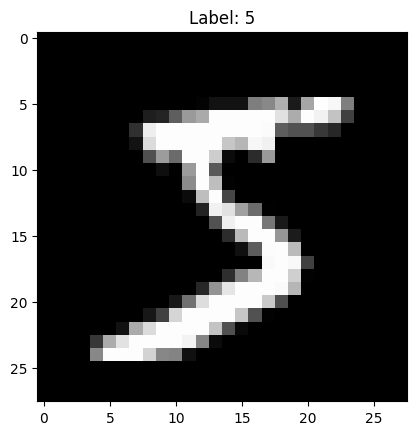

In [ ]:
first = x_train[0]
label = y_train[0]

plt.imshow(first, cmap='gray')
plt.title("Label: " + str(label))
plt.show()

### Data Preprocessing

In this section, we perform preprocessing steps to prepare the input data for model training. Preprocessing is a crucial step in machine learning pipelines as it helps to standardize the data and make it more amenable to effective learning by the models.

We'll start by converting the data type of the pixel values to `float32`. This conversion is necessary to ensure compatibility with subsequent normalization steps and certain machine learning algorithms.

Next, we normalize the pixel values of the images by dividing them by 255.0. This normalization process scales the pixel values to the range [0, 1], making it easier for the model to learn effectively.

Finally, we'll print the minimum and maximum pixel values of the training data to confirm successful normalization. The pixel values should now fall within the desired range, facilitating optimal model training.



In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

print("Minimum pixel value:", np.min(x_train))
print("Maximum pixel value:", np.max(x_train))

Minimum pixel value: 0.0
Maximum pixel value: 1.0


### Data Reshaping

In this section, we reshape the input data to facilitate compatibility with certain machine learning algorithms that require a flattened representation of the input features.

The `reshape` function is applied to both the training and test images to flatten them while preserving the number of samples. This is achieved by specifying `-1` as the second dimension, which automatically computes the size of the second dimension based on the size of the original array.

After reshaping, we print the shapes of the flattened training and test images to verify that the reshaping process was successful and to understand the dimensions of the flattened feature vectors.



In [ ]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

print("Shape of flattened training images:", x_train_flat.shape)
print("Shape of flattened test images:", x_test_flat.shape)

Shape of flattened training images: (60000, 784)
Shape of flattened test images: (10000, 784)


### Model Definition

In this section, we define the architecture of our neural network model for handwritten digit recognition using TensorFlow and Keras.

We start by importing the necessary modules from TensorFlow, including the `Sequential` model and various layers such as `Dense` for fully connected layers.

Next, we set the random seed for reproducibility using `tf.random.set_seed()`. This ensures that the initialization of weights and biases in the neural network is consistent across runs.

The architecture of our model, named "mymodel," is defined as follows:

- **Input Layer**: An input layer with 784 units, corresponding to the flattened representation of the input images (28x28 pixels).
- **Hidden Layers**: Three dense (fully connected) hidden layers with 784, 32, and 16 units, respectively. Each hidden layer uses the ReLU (Rectified Linear Unit) activation function, which introduces non-linearity to the model and enables it to learn complex patterns in the data.
- **Output Layer**: A dense output layer with 10 units, corresponding to the 10 possible classes (digits 0 through 9). The output layer uses the linear activation function to produce raw output values that will be transformed into probabilities using a suitable activation function during training.

After defining the model architecture, we use the `summary()` method to display a concise summary of the model's structure, including the number of parameters in each layer and the total number of trainable parameters.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu


tf.random.set_seed(69)
model = Sequential(
    [
        tf.keras.layers.InputLayer((784,)),
        tf.keras.layers.Dense(784, activation = 'relu'),
        tf.keras.layers.Dense(32, activation = 'relu'),
        tf.keras.layers.Dense(16, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'linear')
    ], name = "mymodel"
)
model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 784)               615440    
                                                                 
 dense_5 (Dense)             (None, 32)                25120     
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 10)                170       
                                                                 
Total params: 641258 (2.45 MB)
Trainable params: 641258 (2.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Extracting Weights and Biases

In this section, we extract the weights and biases from each layer of our neural network model for further analysis. Understanding the parameters of each layer can provide insights into how the model learns and makes predictions.

We begin by accessing the individual layers of our model using Python's unpacking syntax `[layer1, layer2, layer3, layer4] = model.layers`. This allows us to retrieve each layer's weights and biases separately.

For each layer, we extract the weights (`W`) and biases (`b`) using the `get_weights()` method. These parameters represent the learnable parameters of the neural network that are adjusted during the training process to minimize the loss function.

Finally, we print the shapes of the weights and biases for each layer to understand their dimensions and ensure consistency with the model architecture defined earlier.


In [ ]:
[layer1, layer2, layer3, layer4] = model.layers

W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
W4,b4 = layer4.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")
print(f"W4 shape = {W4.shape}, b4 shape = {b4.shape}")

W1 shape = (784, 784), b1 shape = (784,)
W2 shape = (784, 32), b2 shape = (32,)
W3 shape = (32, 16), b3 shape = (16,)
W4 shape = (16, 10), b4 shape = (10,)


### Model Compilation and Training

In this section, we compile and train our neural network model for handwritten digit recognition. Model compilation involves configuring the model for training by specifying the loss function, optimizer, and evaluation metrics. Once compiled, the model is trained using the training data to learn patterns and relationships between input features and target labels.

#### Model Compilation

We use the `compile()` method to configure the model for training. The loss function is set to `SparseCategoricalCrossentropy`, which is suitable for multi-class classification tasks like handwritten digit recognition. We specify `from_logits = True` to indicate that the model's output values are raw logits, allowing for numerical stability during training. Additionally, we choose the Adam optimizer with a learning rate of 0.001 to update the model parameters during training.

#### Model Training

We train the compiled model using the `fit()` method, passing the flattened training images (`x_train_flat`) and their corresponding labels (`y_train`). We specify the number of training epochs as 25, indicating the number of times the entire training dataset will be passed forward and backward through the neural network.

The training process updates the model's weights and biases iteratively to minimize the defined loss function. During training, we monitor the training progress and performance metrics such as loss and accuracy.



In [ ]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
)

history = model.fit(
    x_train_flat, y_train,
    epochs = 25
)

Epoch 1/25
1875/1875 [==============================] - 37s 18ms/step - loss: 0.2437
Epoch 2/25
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0882
Epoch 3/25
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0611
Epoch 4/25
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0458
Epoch 5/25
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0343
Epoch 6/25
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0286
Epoch 7/25
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0252
Epoch 8/25
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0211
Epoch 9/25
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0185
Epoch 10/25
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0185
Epoch 11/25
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0144
Epoch 12/25
1875/1875 [==============================] - 34s 18

### Visualizing Training Loss

In this section, we visualize the training loss over epochs to assess the convergence and performance of our neural network model during training. Monitoring the training loss provides insights into the effectiveness of the model optimization process and helps identify potential issues such as overfitting or underfitting.

We use the `plot()` function from the Matplotlib library to create a line plot of the training loss over epochs. The x-axis represents the training epochs, while the y-axis represents the corresponding loss values. By observing the trend of the loss curve, we can evaluate the model's learning dynamics and make informed decisions regarding model training and hyperparameter tuning.

#### Training Loss Plot

We plot the training loss over epochs using the `history` object obtained from the model training process. The `'loss'` key of the `history.history` dictionary contains the training loss values recorded during each epoch. By plotting this data, we visualize how the training loss changes over time, providing valuable insights into the model's convergence and optimization progress.



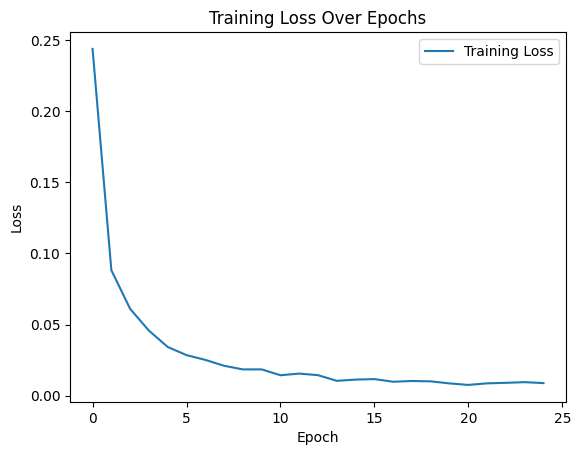

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

### Making Predictions

In this section, we use our trained neural network model to make predictions on the test dataset. Predictions are made by passing the flattened test images through the trained model and obtaining the corresponding output probabilities for each class. The predicted class label for each test sample is then determined based on the class with the highest probability.

#### Model Predictions

We use the `predict()` method of the trained model to obtain the predicted probabilities for each class for the flattened test images (`x_test_flat`). The output of this operation (`y_prob`) is a matrix where each row corresponds to a test sample, and each column represents the probability of that sample belonging to a particular class.

Next, we extract the predicted class labels (`y_pred`) by taking the index of the column with the highest probability for each test sample using the `argmax()` function along the specified axis.

These predicted class labels can then be compared with the true labels of the test dataset to evaluate the performance of our model on unseen data.


In [ ]:
y_prob = model.predict(x_test_flat)
y_pred = y_prob.argmax(axis = 1)

313/313 [==============================] - 2s 7ms/step


### Evaluating Model Performance

In this section, we evaluate the performance of our trained neural network model on the test dataset by computing the accuracy score. Accuracy is a common evaluation metric for classification tasks, representing the proportion of correctly classified samples out of the total number of samples.

#### Accuracy Score Calculation

We use the `accuracy_score()` function from the scikit-learn library to compute the accuracy score of our model's predictions on the test dataset. This function takes two arguments: the true labels (`y_test`) and the predicted labels (`y_pred`). It compares the predicted labels generated by our model with the ground truth labels of the test dataset and calculates the accuracy score.

The accuracy score provides valuable insights into the overall performance of our model in correctly identifying handwritten digits. A higher accuracy score indicates better performance, while a lower score suggests room for improvement in the model's predictive capabilities.



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9812

### Analyzing Incorrect Predictions

In this section, we analyze the incorrect predictions made by our trained neural network model on the test dataset. By comparing the predicted labels with the ground truth labels, we can identify instances where the model failed to classify handwritten digits correctly.

#### Identification of Incorrect Predictions

We use NumPy to identify the indices of test samples where the predicted labels (`y_pred`) do not match the ground truth labels (`y_test`). The `np.where()` function returns the indices of elements that satisfy the specified condition, in this case, where the predicted label is not equal to the ground truth label.

Next, we compute the total number of incorrect predictions (`num_incorrect`) and print it for further analysis.

#### Examples of Incorrect Predictions

Optionally, we can print some examples of incorrect predictions to gain insights into the types of errors made by the model. We iterate over the indices of incorrect predictions and print the predicted and actual labels for each example.

Analyzing these examples can provide valuable feedback on the model's weaknesses and areas for improvement, such as ambiguous or challenging digits that the model struggles to classify accurately.


In [ ]:

# Compare predicted labels with ground truth labels
incorrect_indices = np.where(y_pred != y_test)[0]
num_incorrect = len(incorrect_indices)

# Print the number of incorrect predictions
print(f"Number of incorrect predictions: {num_incorrect}")

# Optionally, print some examples of incorrect predictions
print("Examples of incorrect predictions:")
for i in range(min(5, num_incorrect)):  # Print up to 5 examples
    index = incorrect_indices[i]
    print(f"Predicted: {y_pred[index]}, Actual: {y_test[index]}")


Number of incorrect predictions: 188
Examples of incorrect predictions:
Predicted: 9, Actual: 4
Predicted: 9, Actual: 2
Predicted: 2, Actual: 4
Predicted: 7, Actual: 2
Predicted: 3, Actual: 5


### Visualizing Incorrect Predictions

In this section, we visualize some examples of incorrect predictions made by our trained neural network model on the test dataset. Visualizing these examples helps us understand the types of errors made by the model and provides insights into areas for improvement.

#### Plotting Images of Incorrect Predictions

We plot images of incorrect predictions along with their predicted and real labels to visually inspect the discrepancies between the model's predictions and the ground truth labels. Each subplot in the visualization displays an image of a handwritten digit, along with the predicted label and the actual label.

We iterate over the indices of incorrect predictions and retrieve the corresponding images from the flattened test dataset. The images are reshaped to their original shape (28x28 pixels) before visualization.

#### Examples of Incorrect Predictions

We plot up to 5 examples of incorrect predictions, or fewer if there are fewer than 5 incorrect predictions in total. By visually examining these examples, we can gain insights into the specific challenges faced by the model, such as misclassification of similar-looking digits or ambiguous handwriting.


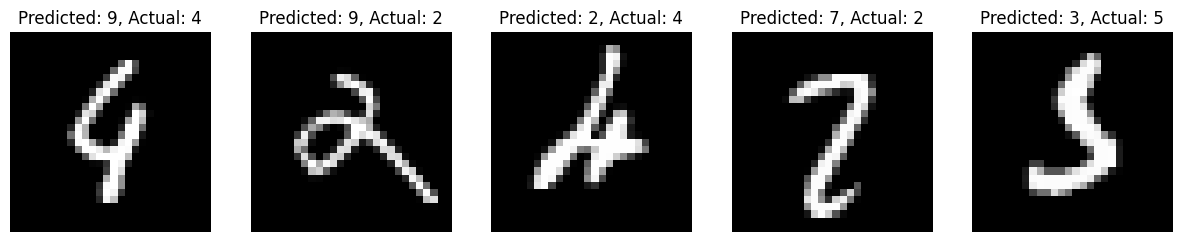

In [ ]:
# Plot images of incorrect predictions along with their predicted and real labels
num_examples_to_plot = min(5, len(incorrect_indices))  # Plot up to 5 examples
fig, axes = plt.subplots(1, num_examples_to_plot, figsize=(15, 3))

for i in range(num_examples_to_plot):
    index = incorrect_indices[i]
    image = x_test_flat[index].reshape(28, 28)  # Reshape flattened image to original shape
    predicted_label = y_pred[index]
    actual_label = y_test[index]

    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Predicted: {predicted_label}, Actual: {actual_label}")
    axes[i].axis('off')

plt.show()
